# Libraries and initialisation

In [1]:
from pathlib import Path
import os
import cmcrameri.cm as cmc

COLOR_MAP = cmc.batlow
COLOR_MAP_NAME = 'cmc_batlows'

import dask
dask.config.set(scheduler='threads') 

# Import module
Importing module can take some times since it is linked to multiple other libraries (<30seconds)

In [2]:
from link_to_module import CL61_module as mCL61

# Open datasets

In [ ]:
# Set some paths to data folder

#ceil_path = str(Path(r'C:\Users\gezas\Documents\CL61\Data'))      ## My portable PC
#ceil_path = str(Path(r'D:\gezas\switchdrive\Private\CL61\Data'))  ## MY FIX PC
#ceil_path = str(Path(r'D:\CL61\Data'))                             # USB Key
server_data_folder = r"Q:\archive\GreenFjord\2023\DATA_RAW\CL61"   # Server path
if not os.path.exists(server_data_folder):
    print("check folder")

In [ ]:
start_data = '2023-02-05 00:00:00'
end_data = '2023-02-07 00:00:00'
februar06 = mCL61.CL61Processor(folder_path=ceil_path, start_datetime=start_data, end_datetime=end_data)
# to open 2days of data it takes : 1m10s

In [4]:
march19 = mCL61.CL61Processor(folder_path='../Data_samples', specific_filename='cl61_20230319.nc')

Bc:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.json
Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.json 


In [3]:
# Or from a specific netcdf file (quicker) 
februar04 = mCL61.CL61Processor(folder_path='../Data_samples', specific_filename='cl61_20230204.nc')

Loading config file at c:\Users\gezas\kDrive\SIE-Project\CL61\CL61_module\config_classification.json 


In [ ]:
# Access archives (takes around 2-3 minutes per day of data)
# This takes 15min with mf_opendataset
first_date = "2023-06-28 00:00:00"
last_date = "2023-06-28 23:59:00"
june = mCL61.CL61Processor(folder_path=server_data_folder,
                           start_datetime=first_date,
                           end_datetime=last_date,
                           parallel_computing=True)

In [ ]:
june28 = june.get_subset(start_time="2023-06-28 00:00:00", end_time="2023-06-28 23:59:00")

## (optional) save to compacted file for improved following usages

In [ ]:
june28.dataset.to_netcdf(r"../Data/cl61_20230628-29.nc")

In [ ]:
july18.dataset.to_netcdf(r"../Data/cl61_20230718.nc")
# took 1m30 from usb to pc

In [ ]:
februar04.dataset.to_netcdf(r"../Data/cl61_20230204.nc")

# Plot basic colormesh of raw data

In [ ]:
june.plot.show_timeserie()
# (server) takes around 6minutes (normal way)
# (server) take 3min with parrallel computing

c:\Users\gezas\.conda\envs\Atm\Lib\site-packages\xarray\core\computation.py:761: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


array([<Axes: xlabel='Time', ylabel='range [m]'>,
       <Axes: xlabel='Time', ylabel='range [m]'>], dtype=object)

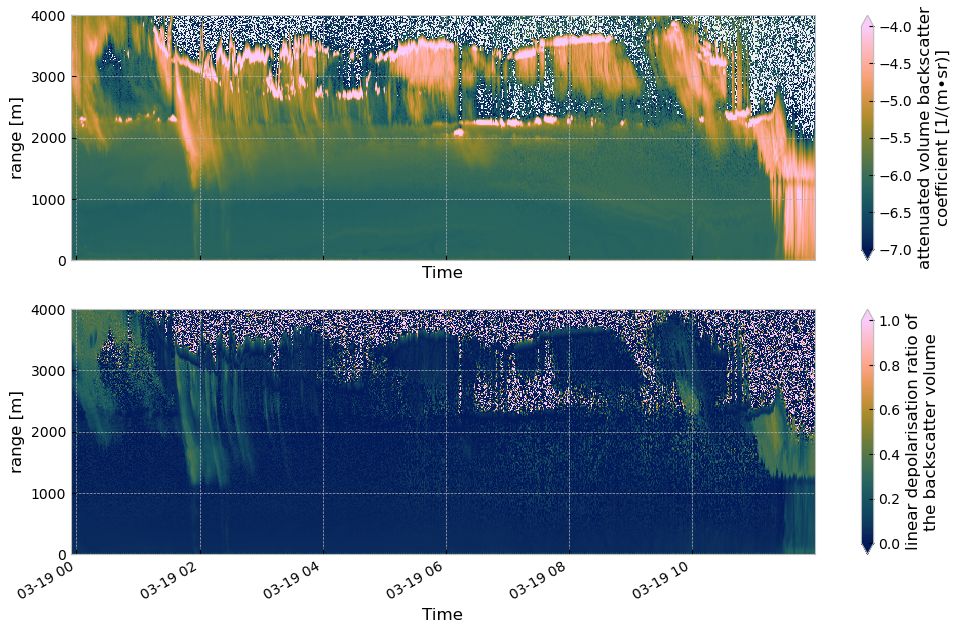

In [14]:
march19.plot.show_timeserie(range_limits=[0,4000])

array([<Axes: xlabel='Time', ylabel='range [m]'>,
       <Axes: xlabel='Time', ylabel='range [m]'>], dtype=object)

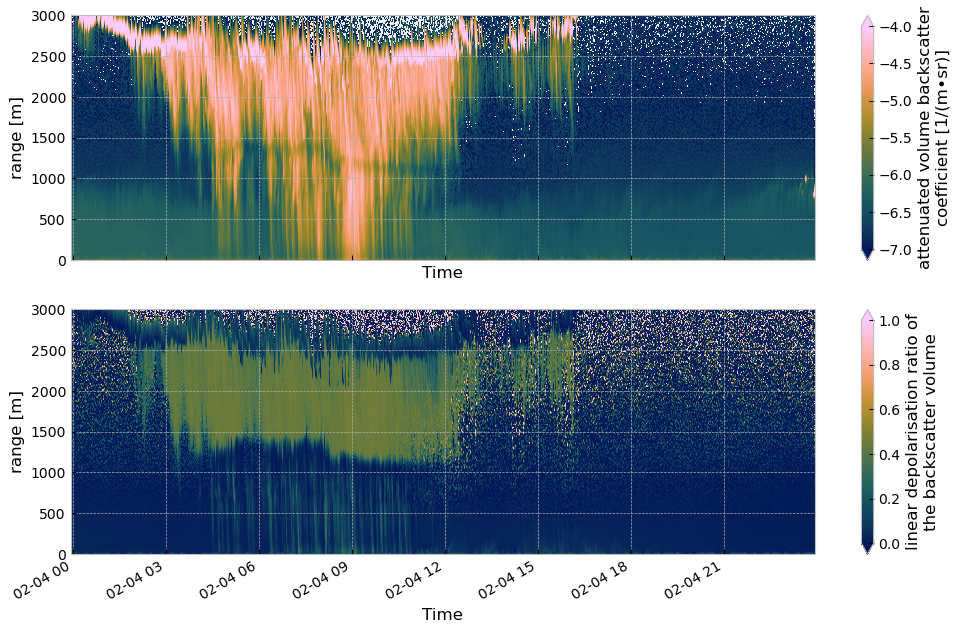

In [5]:
februar04.plot.show_timeserie(range_limits=[0,3000], save_fig=False)

# Filter out noisy part

In [6]:
februar04.process_noise.mask_noise()

The results are stored under new variable: beta_att_clean, linear_depol_ratio_clean, noise mask and to_interpolate_mask


ValueError: Invalid RGBA argument: <matplotlib.colors.ListedColormap object at 0x00000212B6D9F810>

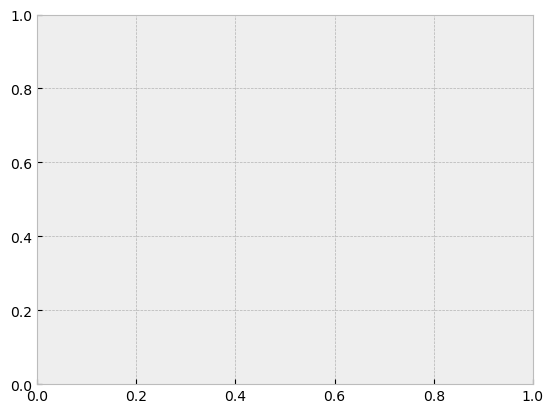

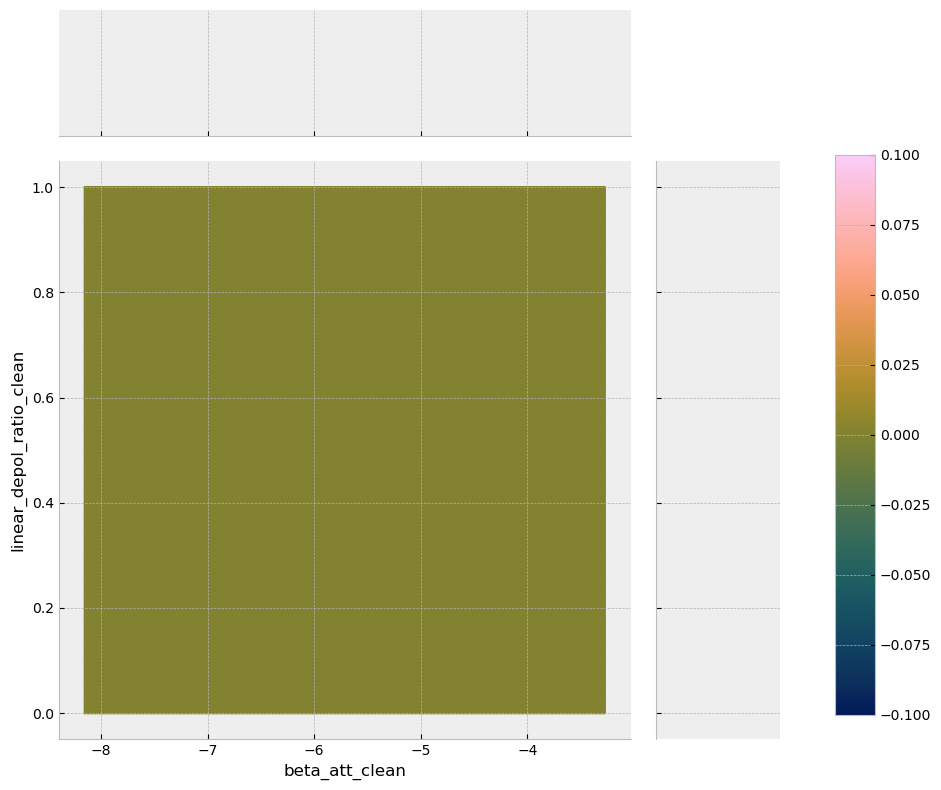

In [7]:
februar04.plot.plot_histogram()

# Visualize results without noise

array([<Axes: xlabel='Time', ylabel='range [m]'>,
       <Axes: xlabel='Time', ylabel='range [m]'>], dtype=object)

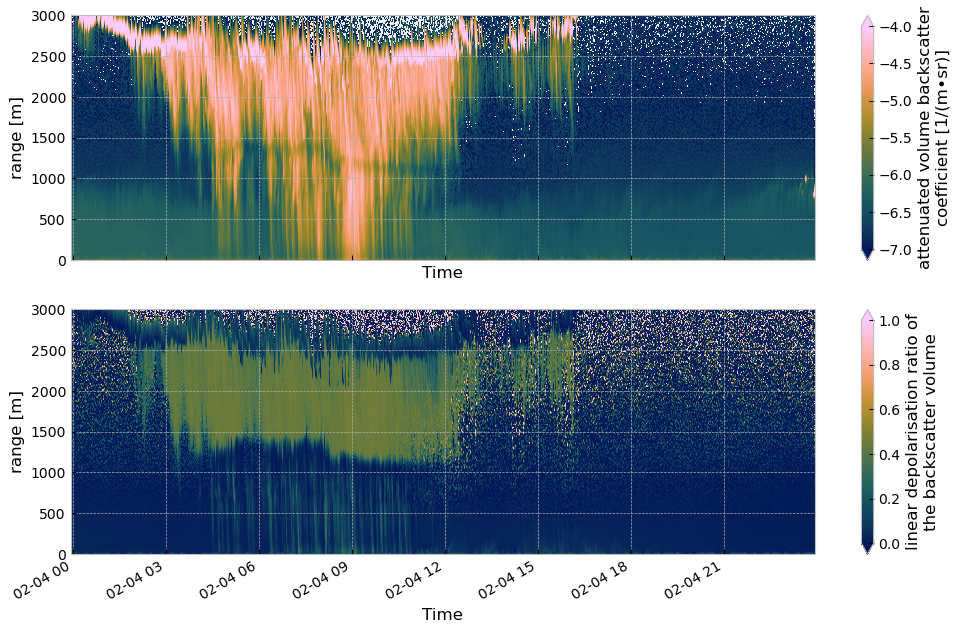

In [9]:
februar04.plot.show_timeserie(varriable_names=['beta_att_clean', 'linear_depol_ratio_clean'],
                          range_limits=[0,3000], save_fig=False)

# Visualize as profiles

In [ ]:
from CL61_module import visualization
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (5,7))
ax = visualization.plotVerticalProfiles(februar04.dataset, time_period="2023-02-04 15:00:00", range_limits=[2500,3200], var_xlims=[[1e-7, 1e-4], [0,1]], ax=ax)
plt.title("CL61 profiles of 2023-02-04 15:00:00")
plt.savefig("feb04_15h_vprofiles_noisy_5km.png", dpi=300)

In [ ]:
from CL61_module import visualization
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (5,7))
ax = visualization.plotVerticalProfiles(februar04.dataset, time_period="2023-02-04 09:00:00", range_limits=[0,15000], var_xlims=[[1e-7, 1e-4], [0,1]], ax=ax)
plt.title("CL61 profiles of 2023-02-04 09:00:00")
plt.savefig("feb04_9h_vprofiles_noisy_5km.png", dpi=300)

In [ ]:
februar04.plot.vertical_profiles(time_of_interest=["2023-04-02 17:30:00"],
                             var_names=['beta_att_clean', 'linear_depol_ratio_clean'],
                             label_first_profile='beta att clean',
                             label_second_profile= 'linear depol ratio clean',
                             range_limits=[0, 15000],
                             x_scales=['log', 'lin'])

In [ ]:
februar04.plot.compare_profiles(time_period= "2023-02-04 15:00:00", comparison='variable', range_limits=[0,5000])

# Classify

## K-mean classificitaiton

(4717440, 3)
Scaler means: [-5.78283455e+00  1.75196911e-01  1.31780207e+03]  
 and scales: [8.24022280e-01 1.74953662e-01 8.67763000e+02]


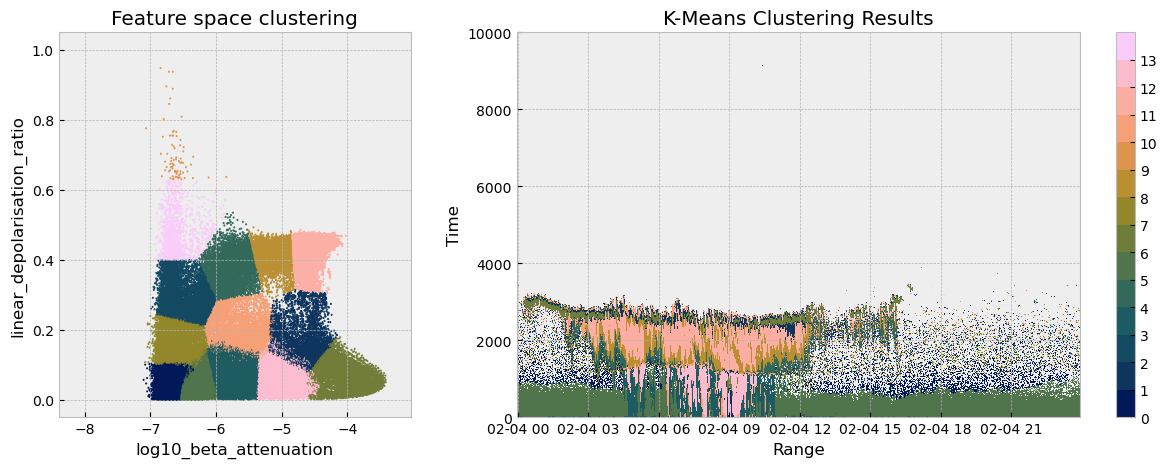

saving results under followingkmean_clusters


In [10]:
februar04.classification.Kmeans_clustering(variable_as_features=['beta_att_clean', 'linear_depol_ratio_clean', 'range'],
                                        weights=[1, 1, 0.25],
                                        cluster_N = 14,
                                        plot_result = True)

# Classify

In [11]:
februar04.classification.classify_clusters()

Classifying cluster from kmean_clusters
 Successful cluster classification stored in dataset under classified_clusters


In [12]:
februar04.plot.show_classified_timeserie(classified_variable='classified_clusters')

AttributeError: 'CL61Processor' object has no attribute 'config'

In [ ]:
plot_classified_colormesh(februar04.dataset['classified_clusters'].T, februar04.dataset['time'], februar04.dataset['range'], februar04.classification.config)

In [ ]:
februar04.classification.classify_elementwise()

In [ ]:
plot_classified_colormesh(februar04.dataset['classified_elements'].T, februar04.dataset['time'], februar04.dataset['range'], februar04.classification.config)

# Same full pipeline for july 18

In [ ]:
#july18 = mCL61.CL61Processor(folder_path=ceil_path, start_datetime="2023-07-18 00:00:00", end_datetime="2023-07-19 00:00:00")
july18 =  mCL61.CL61Processor(folder_path='../Data_samples', specific_filename='cl61_20230718.nc')

In [ ]:
july18.plot_show

In [16]:
july18.process_noise.mask_noise()

The results are stored under new variable: beta_att_clean, linear_depol_ratio_clean, noise mask and to_interpolate_mask


array([<Axes: xlabel='Time', ylabel='range [m]'>,
       <Axes: xlabel='Time', ylabel='range [m]'>], dtype=object)

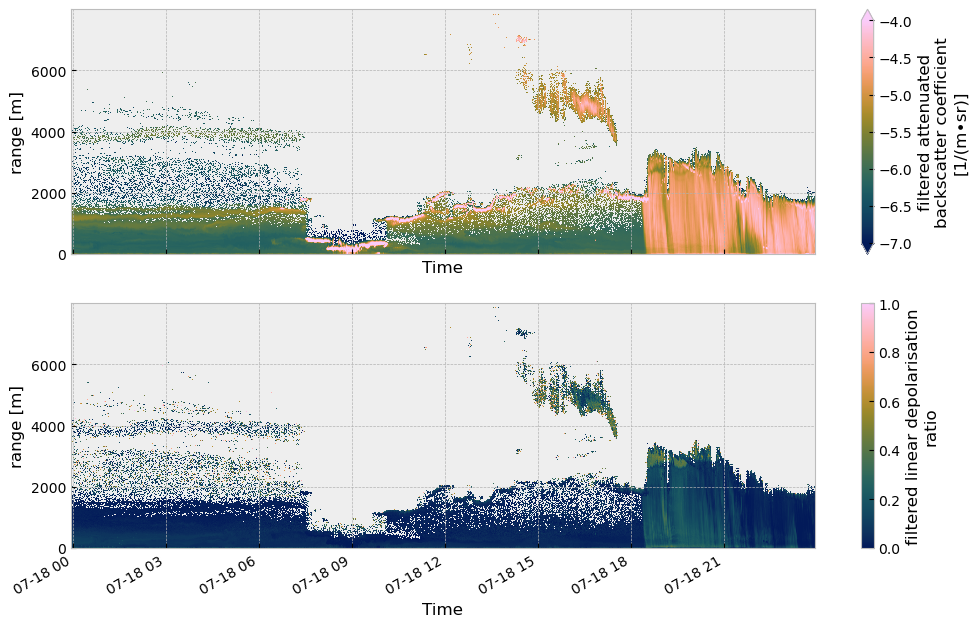

In [18]:
july18.plot.show_timeserie(variable_names=['beta_att_clean', 'linear_depol_ratio_clean'], range_limits=[0,8000])

(4717440, 3)
Scaler means: [-5.52556205e+00  9.73955575e-02  1.39403290e+03]  
 and scales: [6.76281825e-01 1.25925978e-01 1.28124972e+03]


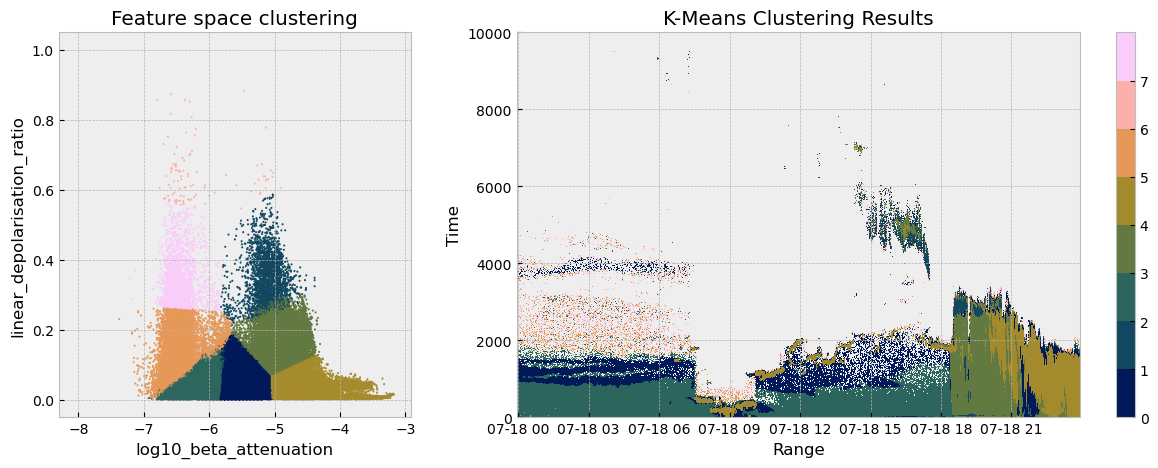

saving results under followingkmean_clusters


In [19]:
# Get data folder
july18.classification.Kmeans_clustering(variable_as_features=['beta_att_clean', 'linear_depol_ratio_clean', 'range'],
                                        weights=[1, 1, 0.25],
                                        cluster_N = 10,
                                        plot_result = True,
                                        kmean_method = 'random')

In [25]:
july18.classification.classify_clusters()

Classifying cluster from kmean_clusters
 Successful cluster classification stored in dataset under classified_clusters


(<Figure size 1000x500 with 2 Axes>,
 <Axes: title={'center': 'Classification Results'}, xlabel='Range', ylabel='Time'>)

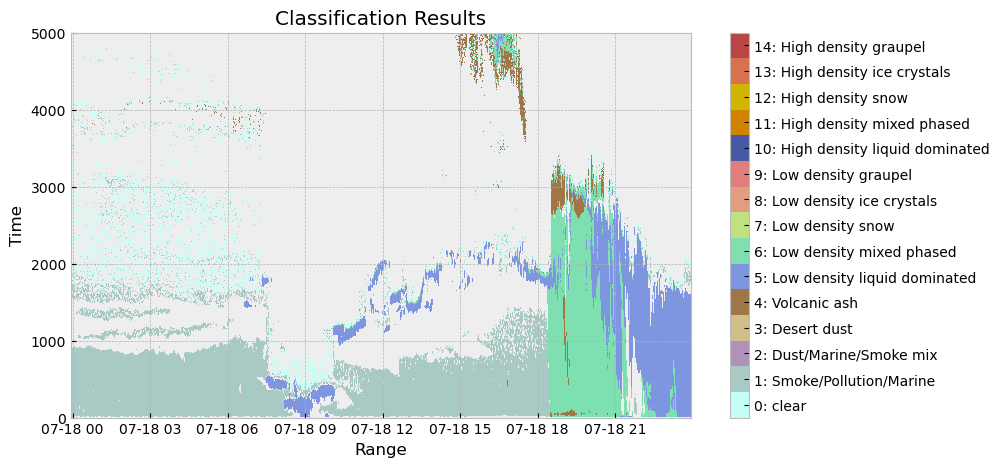

In [26]:
plot_classified_colormesh(july18.dataset['classified_clusters'].T, july18.dataset['time'], july18.dataset['range'], july18.classification.config)

In [ ]:
visualization.plotVerticalProfiles(july18.dataset, time_period="2023-07-18 03:00:00", var_xlims=[[1e-7, 1e-4], [0,1]])
july18.plot.compare_profiles(time_period="2023-07-18 03:00:00", comparison='variable', range_limits=[0,5000])

(0.0, 6000.0)

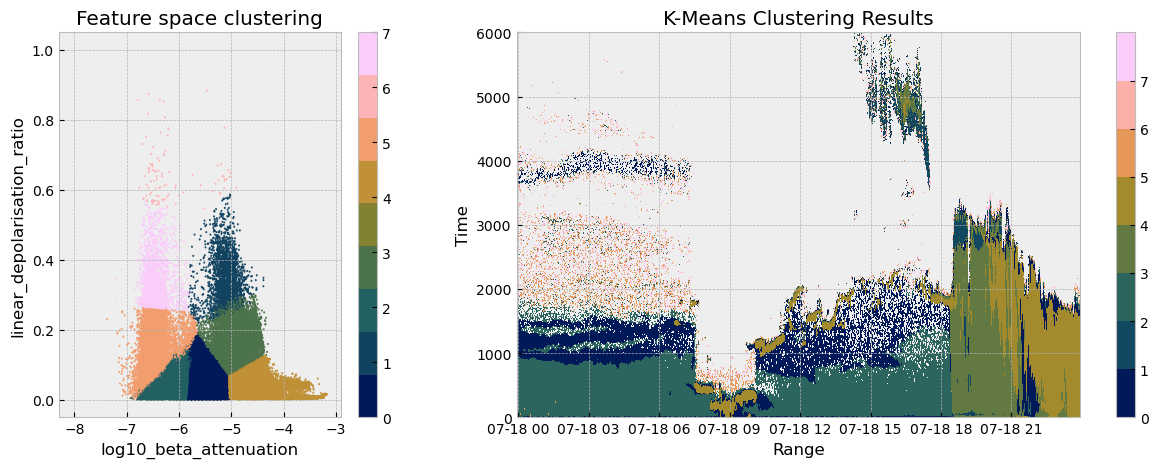

In [29]:
import matplotlib.pyplot as plt
from CL61_module import classification_vizalization
import matplotlib.pyplot as plt
import numpy as np
import cmcrameri.cm as cmc 

feature1_flatten = np.log10(july18.dataset['beta_att_clean'].values.flatten())
feature2_flatten = july18.dataset['linear_depol_ratio_clean'].values.flatten()
cluster_labels_flatten = july18.dataset['kmean_clusters'].values.flatten()

fig, axes = plt.subplots(1,2, figsize = (15,5), width_ratios=[1, 2])
fig, axes[0] = classification_vizalization.visualize_classification_featurespace_2D(feature1_name='log10_beta_attenuation', feature1_flatten=feature1_flatten,
                                                    feature2_name='linear_depolarisation_ratio', feature2_flatten=feature2_flatten,
                                                    cluster_labels_flatten=cluster_labels_flatten,
                                                    fig = fig,
                                                    ax = axes[0])

axes[1], fig = classification_vizalization.visualize_cluster_results(july18.dataset,
                                    july18.dataset['kmean_clusters'].T,
                                    num_categories=8,
                                    fig = fig,
                                    ax = axes[1])
axes[1].set_ylim([0,6000])
    
#plt.savefig('../Outputs/june18_kmeans_N8_range025.jpg', dpi=300)
